# shortest_path

Solve shortest path from origin node(s) to destination node(s).

See also k_shortest_paths to solve multiple shortest paths between a single origin and destination. For additional functionality or different solver algorithms, use NetworkX directly.

In [1]:
# OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks
import osmnx as ox

ox.config(use_cache=True, log_console=False)
ox.__version__

'1.1.2'

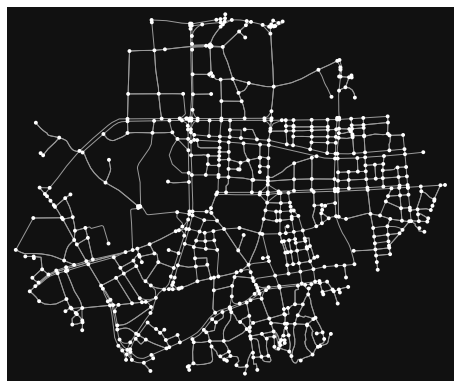

In [2]:
center_point = (37.5661, 126.9783) # (lat, lng) Seoul, South Korea
dist = 1500
dist_type = 'network' # "network", "bbox"
network_type = 'drive' # "all_private", "all", "bike", "drive", "drive_service", "walk"

# Create a graph from OSM within some distance of some (lat, lng) point.
G1 = ox.graph_from_point(
    center_point,
    dist=dist, 
    dist_type=dist_type,
    network_type=network_type)

# Plot a graph.
fig, ax = ox.plot_graph(G1)

In [3]:
# define origin and desination locations 

# 광화문 우체국
origX = 126.97811 # lon
origY = 37.56990 # lat

# 서울역
destX = 126.97223 # lon
destY = 37.55595 # lat

# get the nearest nodes to the locations 
orig = ox.distance.nearest_nodes(G1, origX, origY, return_dist=False)
dest = ox.distance.nearest_nodes(G1, destX, destY, return_dist=False)

## length

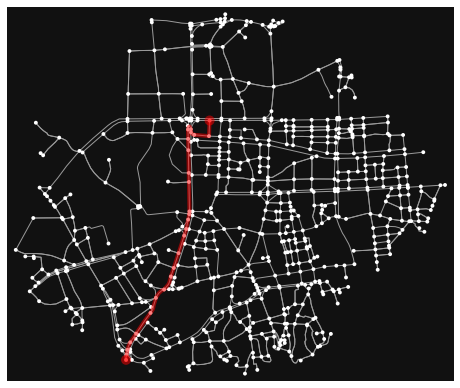

In [4]:
route = ox.distance.shortest_path(G1, orig, dest, weight='length', cpus=1)
fig1_1, ax = ox.plot_graph_route(G1, route, route_color='r', route_linewidth=4, route_alpha=0.5, orig_dest_size=100, ax=None)

## travel_time

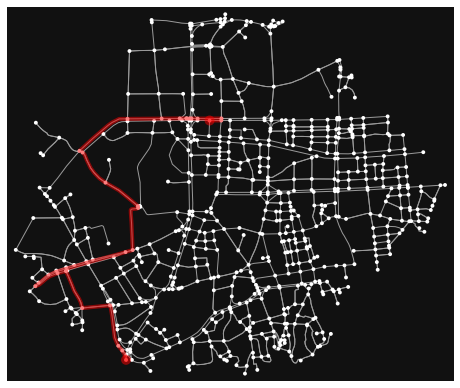

In [5]:
route = ox.distance.shortest_path(G1, orig, dest, weight='travel_time', cpus=1)
fig1_1, ax = ox.plot_graph_route(G1, route, route_color='r', route_linewidth=4, route_alpha=0.5, orig_dest_size=100, ax=None)

## length with travel_time

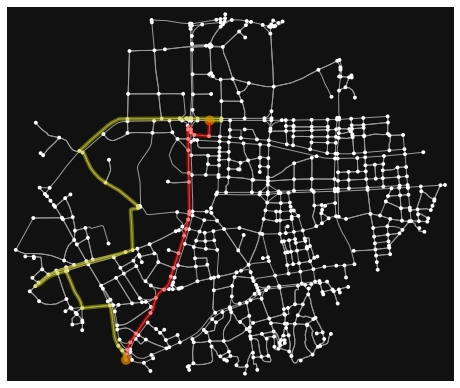

In [6]:
route1 = ox.shortest_path(G1, orig, dest, weight='length', cpus=1)
route2 = ox.shortest_path(G1, orig, dest, weight='travel_time', cpus=1)

# plot the routes
fig2, ax = ox.plot_graph_routes(G1, routes=[route1, route2], route_colors=['r', 'y'], route_linewidth=4, route_linewidths=4)